c:\Users\waluigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 19 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Best fit period: 0.505 d


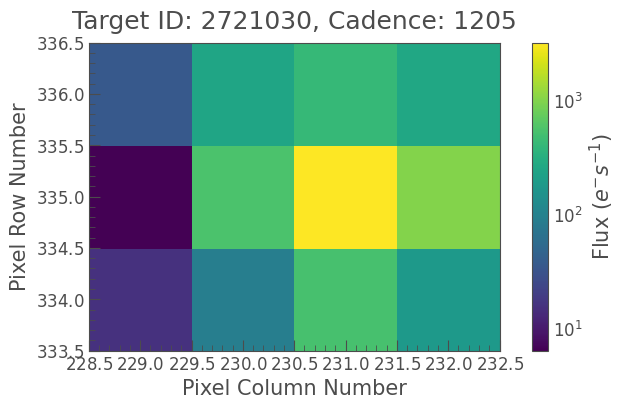

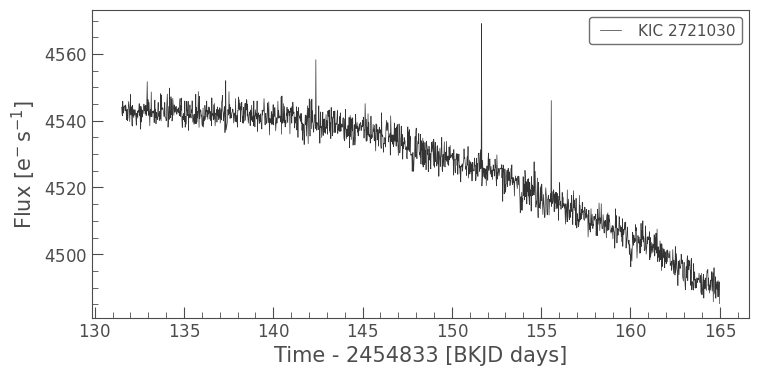

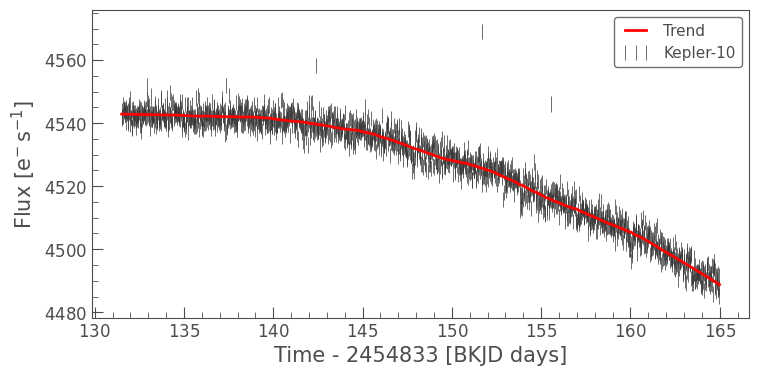

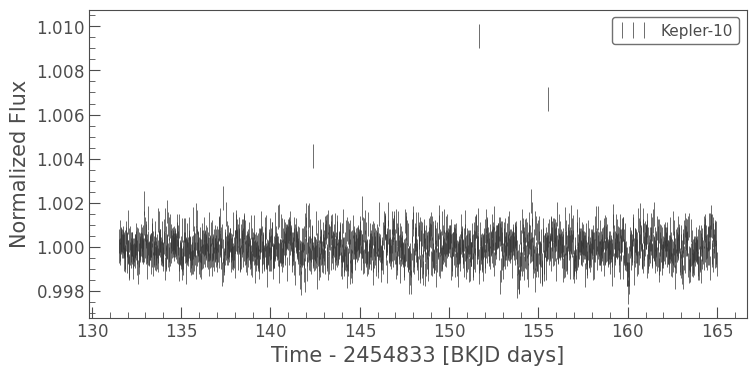

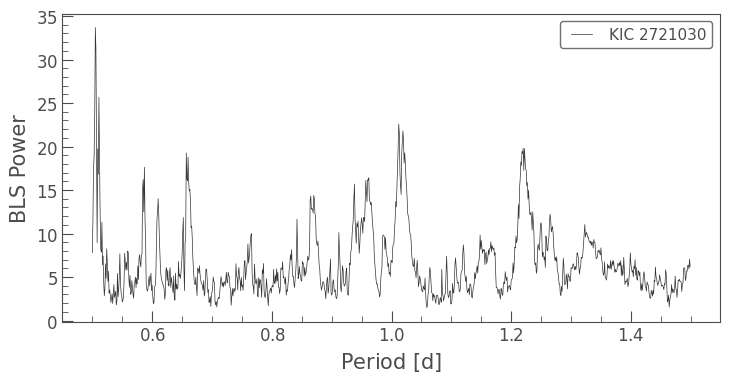

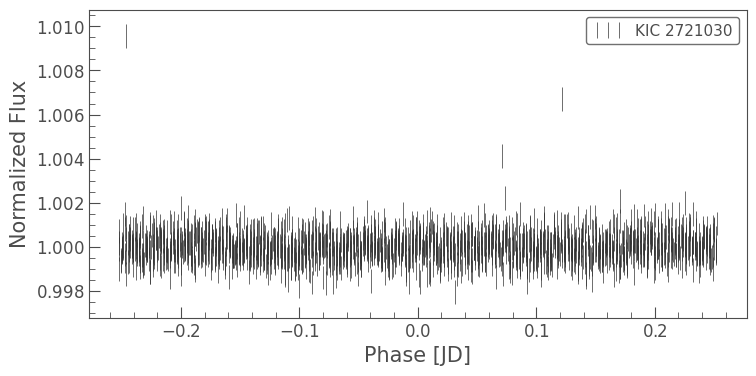

In [8]:
%matplotlib inline
import lightkurve as lk
import numpy as np

tpf = lk.search_targetpixelfile("2721030").download()

tpf.plot(frame=100, scale='log', show_colorbar=True)

lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
lc.plot()

flat, trend = lc.flatten(window_length=301, return_trend=True)
ax = lc.errorbar(label="Kepler-10")                   # plot() returns a matplotlib axes ...
trend.plot(ax=ax, color='red', lw=2, label='Trend');  # which we can pass to the next plot() to use the same axes

flat.errorbar(label="Kepler-10")

periodogram = flat.to_periodogram(method="bls", period=np.arange(0.5, 1.5, 0.001))
periodogram.plot()

best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

flat.fold(period=best_fit_period, epoch_time=periodogram.transit_time_at_max_power).errorbar();